<a href="https://colab.research.google.com/github/kacunha/Data-Science-Projects/blob/master/PROJETO_Analisando_a_Viol%C3%AAncia_no_Rio_de_Janeirob.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><img src="http://sigmoidal.ai/wp-content/uploads/2019/08/logo_color.png" height="40px"></center>

# Analisando a Violência no Rio de Janeiro

<center><img alt="Analisando Airbnb" width="30%" src="https://cdn.pixabay.com/photo/2015/06/14/23/35/rio-de-janeiro-809756__340.jpg"></center>

O Rio de Janeiro é a segunda maior metrópole do Brasil (depois de São Paulo), a sexta maior da América.
Representando o segundo maior PIB do país, o estado enfrenta problemas com criminalidade conforme vem sendo noticiado.

Nesse projeto iremos utilizar a base de dados da Polícia Militar do Rio de Janeiro sobre a violência.



## Obtenção dos Dados

Os dados foram obtidos diretamento do portal ISPDados, que é uma página de Dados Abertos do Instituto de Segurança Pública do Rio de Janeiro.

As estatísticas divulgadas no portal são construídas a partir dos Registros de Ocorrência (RO) lavrados nas delegacias de Polícia Civil do Estado do Rio de Janeiro, além de informações complementares de órgãos específicos da Polícia Militar do Estado do Rio de Janeiro.

Como forma de criar um controle de qualidade, antes de serem consolidados no ISP os RO são submetidos à Corregedoria Interna da Polícia Civil (COINPOL). As estatísticas produzidas baseiam-se na data em que foi confeccionado o Registro de Ocorrência.

No caso do *dataset* a ser utilizado aqui, o arquivo `csv` pode ser baixado diretamente [neste link](https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv).

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


%matplotlib inline

In [0]:
# importar o arquivo para um DataFrame
df = pd.read_csv("https://raw.githubusercontent.com/carlosfab/curso_data_science_na_pratica/master/modulo_02/violencia_rio.csv", sep=";")

## Análise Inicial dos Dados

Esta etapa tem como objetivo permitir o entendimento de como os dados estão estruturados.


In [0]:
#Verificar o tamanho do dataframe
df.shape

(344, 56)

In [0]:
# identificar o volume de dados do DataFrame
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[1]))




Variáveis:	 344
Entradas:	 56



In [0]:
# imprimir os nomes das colunas
df.columns

Index(['vano', 'mes', 'hom_doloso', 'lesao_corp_morte', 'latrocinio',
       'hom_por_interv_policial', 'tentat_hom', 'lesao_corp_dolosa', 'estupro',
       'hom_culposo', 'lesao_corp_culposa', 'roubo_comercio',
       'roubo_residencia', 'roubo_veiculo', 'roubo_carga', 'roubo_transeunte',
       'roubo_em_coletivo', 'roubo_banco', 'roubo_cx_eletronico',
       'roubo_celular', 'roubo_conducao_saque', 'roubo_apos_saque',
       'roubo_bicicleta', 'outros_roubos', 'total_roubos', 'furto_veiculos',
       'furto_transeunte', 'furto_coletivo', 'furto_celular',
       'furto_bicicleta', 'outros_furtos', 'total_furtos', 'sequestro',
       'extorsao', 'sequestro_relampago', 'estelionato', 'apreensao_drogas',
       'posse_drogas', 'trafico_drogas', 'apreensao_drogas_sem_autor',
       'recuperacao_veiculos', 'apf', 'aaapai', 'cmp', 'cmba', 'ameaca',
       'pessoas_desaparecidas', 'encontro_cadaver', 'encontro_ossada',
       'pol_militares_mortos_serv', 'pol_civis_mortos_serv',
       'ind

In [0]:
# ver os tipos das variáveis 
display(df.dtypes)

vano                           int64
mes                            int64
hom_doloso                     int64
lesao_corp_morte              object
latrocinio                     int64
hom_por_interv_policial       object
tentat_hom                     int64
lesao_corp_dolosa              int64
estupro                       object
hom_culposo                   object
lesao_corp_culposa            object
roubo_comercio                 int64
roubo_residencia               int64
roubo_veiculo                  int64
roubo_carga                    int64
roubo_transeunte               int64
roubo_em_coletivo              int64
roubo_banco                    int64
roubo_cx_eletronico           object
roubo_celular                 object
roubo_conducao_saque          object
roubo_apos_saque              object
roubo_bicicleta               object
outros_roubos                  int64
total_roubos                   int64
furto_veiculos                 int64
furto_transeunte               int64
f

In [0]:
#Visualizar as 5 primeiras linhas
df.head()

vano  mes  hom_doloso  ... indicador_roubo_veic  registro_ocorrencias fase
0  1991    1         657  ...                 1174                          3
1  1991    2         732  ...                 1097                          3
2  1991    3         713  ...                 1265                          3
3  1991    4         634  ...                 1415                          3
4  1991    5         650  ...                 1449                          3

[5 rows x 56 columns]

In [0]:
#Visualizar 5 últimas entradas
df.tail()

vano  mes  hom_doloso  ... indicador_roubo_veic  registro_ocorrencias fase
339  2019    4         360  ...                 3755                 67797    3
340  2019    5         345  ...                 3649                 68336    3
341  2019    6         332  ...                 3115                 61202    3
342  2019    7         309  ...                 3198                 65817    2
343  2019    8         318  ...                 3181                 65285    2

[5 rows x 56 columns]

### **Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [0]:
# ver os valores faltantes das colunas
df.isnull().sum() / df.shape[0]

vano                          0.0
mes                           0.0
hom_doloso                    0.0
lesao_corp_morte              0.0
latrocinio                    0.0
hom_por_interv_policial       0.0
tentat_hom                    0.0
lesao_corp_dolosa             0.0
estupro                       0.0
hom_culposo                   0.0
lesao_corp_culposa            0.0
roubo_comercio                0.0
roubo_residencia              0.0
roubo_veiculo                 0.0
roubo_carga                   0.0
roubo_transeunte              0.0
roubo_em_coletivo             0.0
roubo_banco                   0.0
roubo_cx_eletronico           0.0
roubo_celular                 0.0
roubo_conducao_saque          0.0
roubo_apos_saque              0.0
roubo_bicicleta               0.0
outros_roubos                 0.0
total_roubos                  0.0
furto_veiculos                0.0
furto_transeunte              0.0
furto_coletivo                0.0
furto_celular                 0.0
furto_biciclet

In [0]:
df.replace(r'^\s*$', np.nan, regex=True, inplace=True)

Após rodar as células acima, percebe-se que é visível que há dados ausentes. Entretanto, quando se executa df.isnull().sum(), aparentemente o dataset está completo.

Após analisar o arquivo csv, nota-se que os campos "ausentes" estão na verdade preenchidos com uma string vazia do tipo ''.

Buscando a solução para o problema, uma das alternativas fornecidas encontradas (este link link text) é executar o seguinte código:

In [0]:
# importar o numpy e substituir valores ausentes
import numpy as np
df = df.replace(r'^\s*$', np.nan, regex=True)

# ver as 5 primeiras entradas após a substituição
df.head()

vano  mes  hom_doloso  ... indicador_roubo_veic  registro_ocorrencias fase
0  1991    1         657  ...                 1174                   NaN    3
1  1991    2         732  ...                 1097                   NaN    3
2  1991    3         713  ...                 1265                   NaN    3
3  1991    4         634  ...                 1415                   NaN    3
4  1991    5         650  ...                 1449                   NaN    3

[5 rows x 56 columns]

In [0]:
df.isnull().sum() / df.shape[0]

vano                          0.000000
mes                           0.000000
hom_doloso                    0.000000
lesao_corp_morte              0.279070
latrocinio                    0.000000
hom_por_interv_policial       0.244186
tentat_hom                    0.000000
lesao_corp_dolosa             0.000000
estupro                       0.418605
hom_culposo                   0.244186
lesao_corp_culposa            0.279070
roubo_comercio                0.000000
roubo_residencia              0.000000
roubo_veiculo                 0.000000
roubo_carga                   0.000000
roubo_transeunte              0.000000
roubo_em_coletivo             0.000000
roubo_banco                   0.000000
roubo_cx_eletronico           0.418605
roubo_celular                 0.313953
roubo_conducao_saque          0.418605
roubo_apos_saque              0.418605
roubo_bicicleta               0.802326
outros_roubos                 0.000000
total_roubos                  0.000000
furto_veiculos           

## Informações Estatísticas da Violência no Rio de Janeiro

Iremos analisar alguns dados estatísticos conforme abaixo.

In [0]:
#Resumo estatístico 
df.describe()

vano         mes  ...  indicador_roubo_veic        fase
count   344.000000  344.000000  ...            344.000000  344.000000
mean   2004.837209    6.453488  ...           2448.697674    2.994186
std       8.289036    3.447759  ...            789.689559    0.076138
min    1991.000000    1.000000  ...           1097.000000    2.000000
25%    1998.000000    3.000000  ...           1889.750000    3.000000
50%    2005.000000    6.000000  ...           2322.000000    3.000000
75%    2012.000000    9.000000  ...           2778.000000    3.000000
max    2019.000000   12.000000  ...           5358.000000    3.000000

[8 rows x 26 columns]

In [0]:
#Média do roubo de veículos:
mean_roubo_veiculo = df.roubo_veiculo.mean()
print(mean_roubo_veiculo)

2448.6976744186045


In [0]:
#Média do furto de veículos:
mean_furto_veiculos = df.furto_veiculos.mean()
print(mean_furto_veiculos)

1674.671511627907


In [0]:
#Média de recuperação de veículos:
mean_recuperacao_veiculos = df.recuperacao_veiculos.mean()
print(mean_recuperacao_veiculos)

1772.2383720930231


In [0]:
# ver a porcentagem de carros recuperados em relação aos carros roubados + carros furtados
mean_recuperacao_veiculos / (mean_furto_veiculos + mean_roubo_veiculo)

0.42980346705075084

In [0]:
# valores max e min de hom_doloso
max_hom_doloso = df.hom_doloso.max()
min_hom_doloso = df.hom_doloso.min()

# imprimir os valores máximos e mínimos
print("Min:\t{}".format(min_hom_doloso))
print("Max:\t{}".format(max_hom_doloso))

Min:	272
Max:	831


## Visualização de Dados

Com o propósito de facilitar a compreensão dos dados. Abaixo podemos ver:

* Histograma utilizando o campo `hom_doloso`
* Gráfico de linhas para a variável `roubo_em_coletivo`


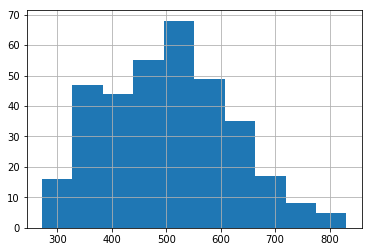

In [0]:
# plotar histograma do volume
df['hom_doloso'].hist();

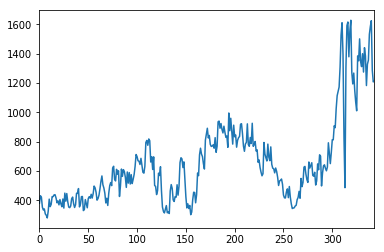

In [0]:
df['roubo_em_coletivo'].plot();

## Conclusão

O uso de dataset reais podem trazer alguns problemas como campos em branco, dados faltantes. Como parte da rotina de um Data Scientist é necessário realizar o entendimento dos dados e avaliar qual a melhor abordagem.
Vale ressaltar a importância da etapa de extração e limpeza dos dados.